## <span style='background:Blue'>  Laptop Price predictor  </span>

 <font color=yellow>**Motive** </font>:- To predict the laptop price using some parameters such as<font color=green> **Company**, **Type**, **Ram**, **Weight**, **IPS panel**, **touch**, **CPU**, **HDD**, **SSD**, **GPU**, **OS**.</font>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

dataset:- https://github.com/Vishesh-panghal/Machine-learning/blob/master/Datasets/laptop_data.csv

In [3]:
df = pd.read_csv("../../../Datasets/laptop_data.csv")
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.shape

(1303, 12)

In [5]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


### Observation:

As here we see that:

1. **ScreenResolution:** Currently it has three types of information, screen size and display quality and touchscreen or not.
2. **CPU:** Same here also we get two types of information, processor and speed.
3. **RAM:** Here we remove the GB word from last and make it to int64 because in today's world 99% of laptops have RAM in GB's.
4. **Weight:** Here also we remove kg to make it float64.
5. **Memory** Here we get 4 information i.e, HDD,SSD,Flash storage,Hybrid.

Handle Ram and Weight column

In [8]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df['Ram'] = df['Ram'].str.replace('GB','',)
df['Weight'] = df['Weight'].str.replace('kg','',)
df['Ram'] = df['Ram'].astype('int64')
df['Weight'] = df['Weight'].astype('float64')

In [9]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 112.1+ KB


In [11]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [15]:
df = df.drop_duplicates()

In [17]:
df.shape

(1274, 11)

In [18]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1095,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,Windows 10,2.40,42570.720
124,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,256GB SSD,AMD Radeon R5,Windows 10,2.10,24029.280
708,Lenovo,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6300HQ 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.80,63456.480
612,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,1TB HDD,Intel HD Graphics 520,Linux,2.18,23650.992
461,Acer,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,128GB SSD,Intel HD Graphics 400,Windows 10,1.40,23176.800


## 🔭 EDA:- 

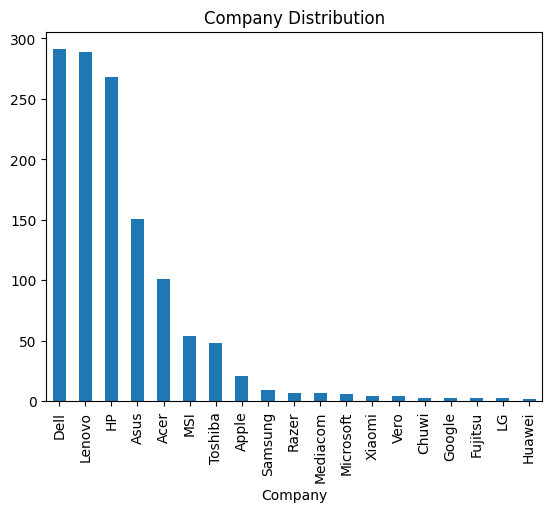

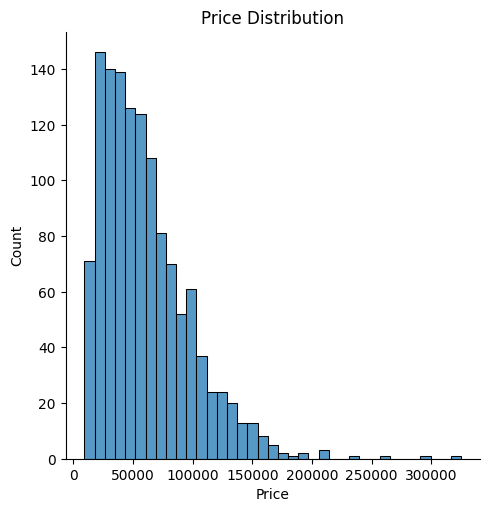

In [19]:
df['Company'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Company Distribution')

sns.displot(df['Price'])
plt.title('Price Distribution')
plt.show()

observation: Both price and company are skewed data

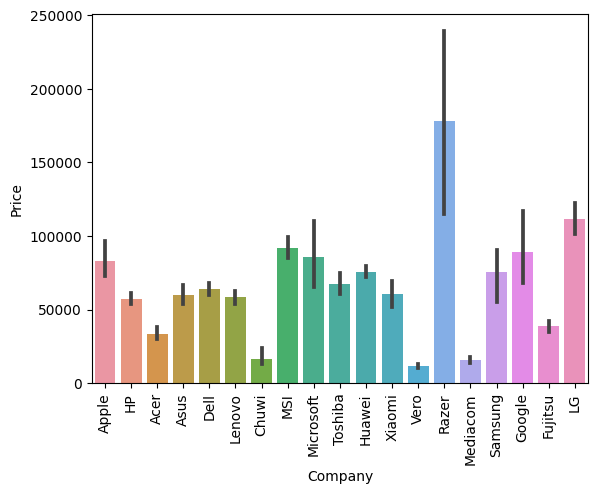

In [20]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='TypeName'>

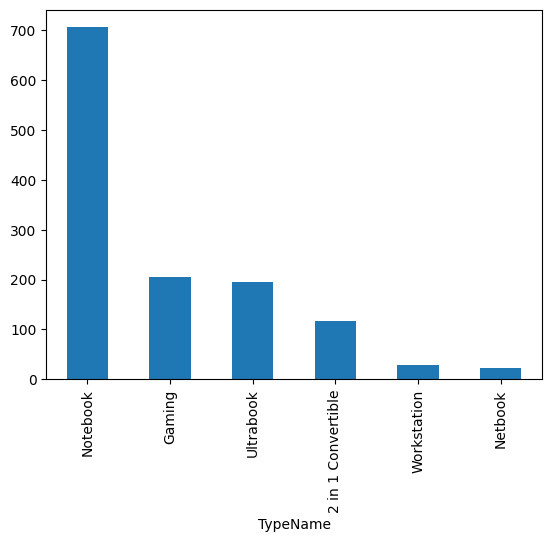

In [21]:
df['TypeName'].value_counts().plot(kind='bar')

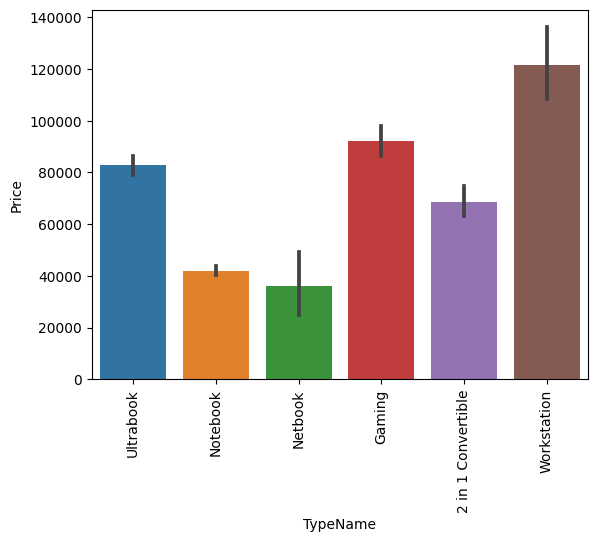

In [22]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

observation: There is a coorelation between Type and Price.

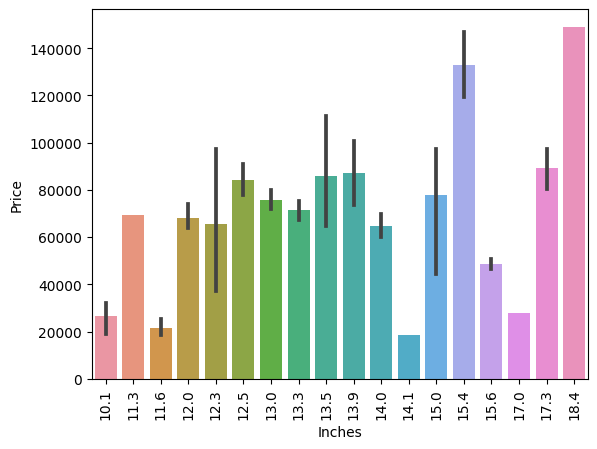

In [23]:
sns.barplot(x=df['Inches'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

observation: There is no such a coorelation between price and screen size.

***

Screen resolution

In [24]:
df['IPS panel']= df['ScreenResolution'].apply(lambda x:1 if "IPS" in x else 0)

In [25]:
df['Touchscreen']= df['ScreenResolution'].apply(lambda x:1 if "Touchscreen" in x else 0)

In [26]:
temp_df = df['ScreenResolution'].str.split('x',n= 1,expand=True)
temp_df

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1269,1366,768
1270,IPS Panel Full HD / Touchscreen 1920,1080
1271,IPS Panel Quad HD+ / Touchscreen 3200,1800
1272,1366,768


In [27]:
df['X_res'] = temp_df[0]
df['Y_res'] = temp_df[1]

In [28]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [29]:
df['X_res']= df['X_res'].astype('int64')
df['Y_res']= df['Y_res'].astype('int64')

Formula of ppi:- $ \frac{ \sqrt{(X resolution^2)+ (Y resolution^2)}}{Inch} $

In [30]:
df['ppi'] = ((df['X_res']**2)+(df['Y_res']**2))**0.5/df['Inches'].astype('float')

In [31]:
df.drop(columns='ScreenResolution',inplace=True)
df.drop(columns='Inches',inplace=True)
df.drop(columns='X_res',inplace=True)
df.drop(columns='Y_res',inplace=True)

In [32]:
df.head(1)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS panel,Touchscreen,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983005


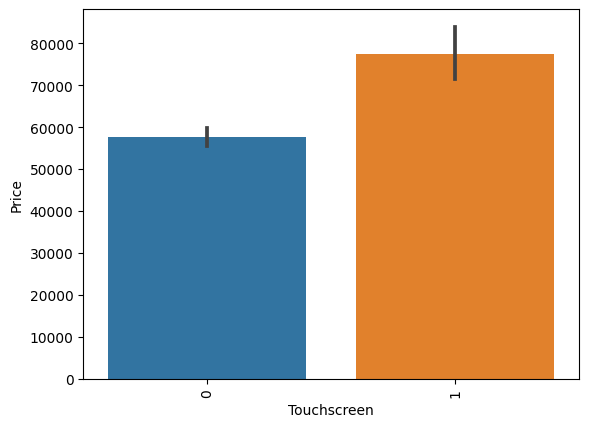

In [33]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

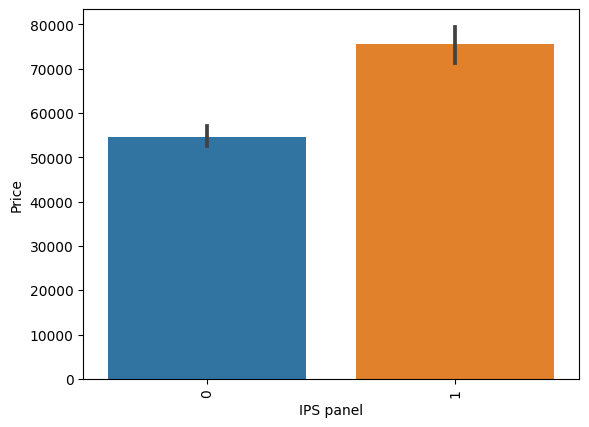

In [34]:
sns.barplot(x=df['IPS panel'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [35]:
df.corr(numeric_only=True)['Price']

Ram            0.740106
Weight         0.212192
Price          1.000000
IPS panel      0.250358
Touchscreen    0.188631
ppi            0.469539
Name: Price, dtype: float64

observation: As here we can see Price coorelations with different parameters

***

Cpu

In [36]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 2.9GHz             1
AMD A6-Series 7310 2GHz          1
AMD A9-Series 9410 2.9GHz        1
Name: count, Length: 118, dtype: int64

In [37]:
df['Processor'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [38]:
def fetch_processor(text):

  if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
    return text
  elif text.split()[0] == "Intel":
    return "Other Intel processor"
  else:
    return "AMD processor"

In [39]:
df['Cpu brand'] = df['Processor'].apply(fetch_processor)

In [40]:
df.drop(columns='Processor',inplace=True)
df.drop(columns='Cpu',inplace=True)

<Axes: xlabel='Cpu brand'>

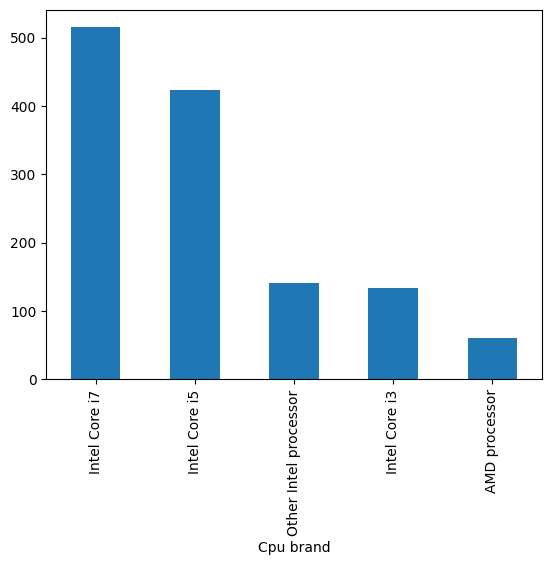

In [41]:
df['Cpu brand'].value_counts().plot(kind='bar')

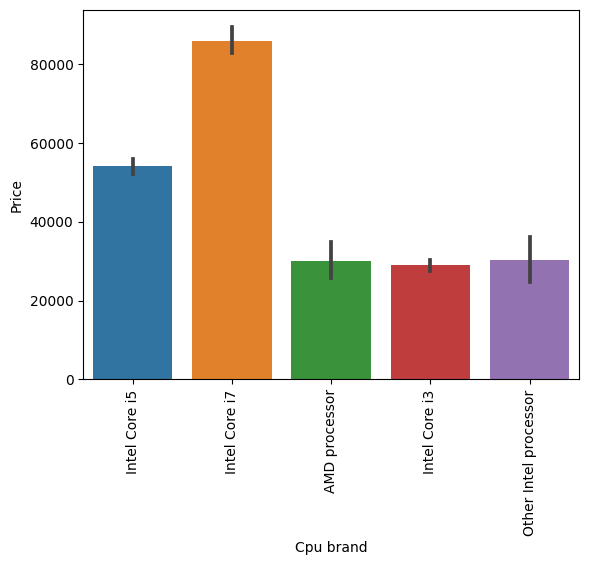

In [42]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

***

Memory

In [43]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"][0]
df["second"] = df["second"][0]

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])
df["HDD"] = pd.to_numeric(df["HDD"].str.replace('SSD', '', regex=True), errors='coerce')
df["SSD"] = pd.to_numeric(df["SSD"].str.replace('SSD', '', regex=True), errors='coerce')
df["Hybrid"] = pd.to_numeric(df["Hybrid"].str.replace('SSD', '', regex=True), errors='coerce')
df["Flash_Storage"] = pd.to_numeric(df["Flash_Storage"].str.replace('SSD', '', regex=True), errors='coerce')

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [44]:
#df.drop(columns=['HDD', 'SSD','Hybrid', 'Flash_Storage'],inplace=True)

In [45]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price', 'IPS panel', 'Touchscreen', 'ppi', 'Cpu brand', 'HDD', 'SSD',
       'Hybrid', 'Flash_Storage'],
      dtype='object')

In [46]:
df.drop(columns=['Memory'],inplace=True)

In [47]:
df.sample(1)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,IPS panel,Touchscreen,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
540,Dell,Ultrabook,8,Intel UHD Graphics 620,Windows 10,1.2,74538.72,0,1,276.05353,Intel Core i7,NaN,128.0,NaN,NaN


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1274 non-null   object 
 1   TypeName       1274 non-null   object 
 2   Ram            1274 non-null   int64  
 3   Gpu            1274 non-null   object 
 4   OpSys          1274 non-null   object 
 5   Weight         1274 non-null   float64
 6   Price          1274 non-null   float64
 7   IPS panel      1274 non-null   int64  
 8   Touchscreen    1274 non-null   int64  
 9   ppi            1274 non-null   float64
 10  Cpu brand      1274 non-null   object 
 11  HDD            558 non-null    float64
 12  SSD            833 non-null    float64
 13  Hybrid         10 non-null     float64
 14  Flash_Storage  71 non-null     float64
dtypes: float64(7), int64(3), object(5)
memory usage: 191.5+ KB


In [49]:
df['SSD'].fillna(0,inplace=True)
df['HDD'].fillna(0,inplace=True)

In [52]:
df.corr(numeric_only=True)['Price']

Ram            0.740106
Weight         0.212192
Price          1.000000
IPS panel      0.250358
Touchscreen    0.188631
ppi            0.469539
HDD           -0.424256
SSD            0.502688
Name: Price, dtype: float64

In [51]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

***

Gpu

In [53]:
df['Gpu brand'] = df['Gpu'].apply(lambda x: x.split()[0])

In [54]:
df.drop(columns=['Gpu'],inplace=True)

In [55]:
df.sample(1)

,Company,TypeName,Ram,OpSys,Weight,Price,IPS panel,Touchscreen,ppi,Cpu brand,HDD,SSD,Gpu brand
59,Asus,Notebook,4,Linux,2.0,22111.2,0,0,141.211998,Intel Core i3,0.0,128.0,Intel


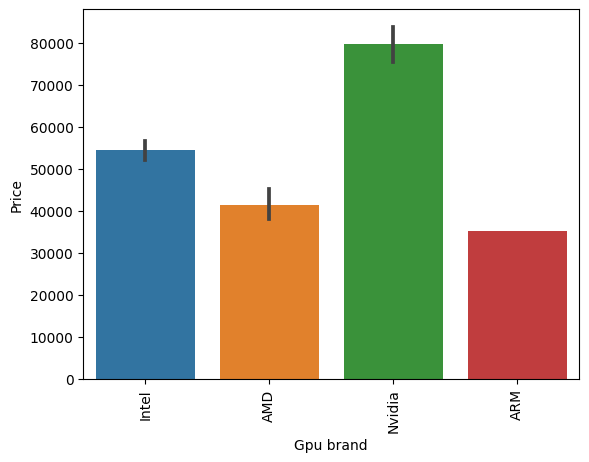

In [56]:
sns.barplot(x=df['Gpu brand'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

***

Operating System

In [57]:
df['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

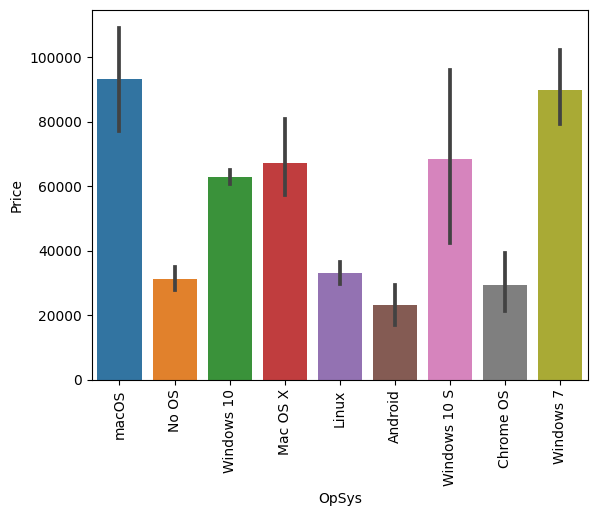

In [58]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [59]:
def cat_os(input):
    if input == 'Windows 10' or input == 'Windows 7' or input == 'Windows 10 S':
        return "Windows"
    elif input == 'macOS' or input == 'Mac OS X':
        return "MacOs"
    else:
       return "Linux/Chrome/Android/Other"

In [60]:
df['os'] = df['OpSys'].apply(cat_os)

In [61]:
df.drop(columns=['OpSys'],inplace=True)

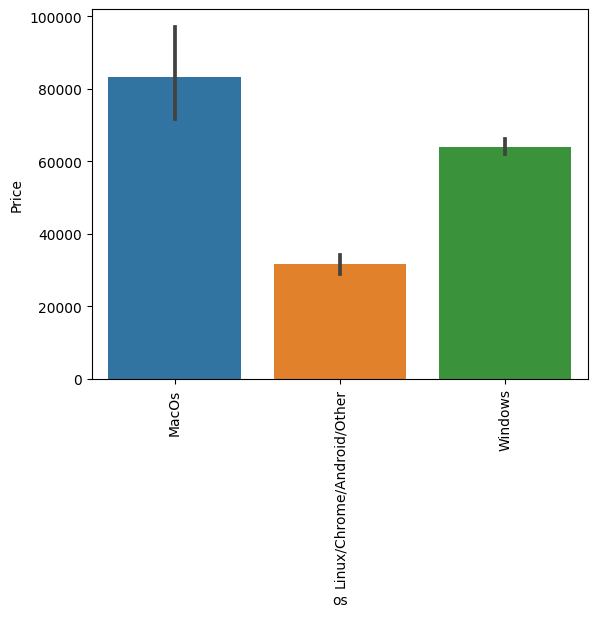

In [62]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [63]:
df.head(1)

,Company,TypeName,Ram,Weight,Price,IPS panel,Touchscreen,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,1,0,226.983005,Intel Core i5,0.0,128.0,Intel,MacOs


***

weight

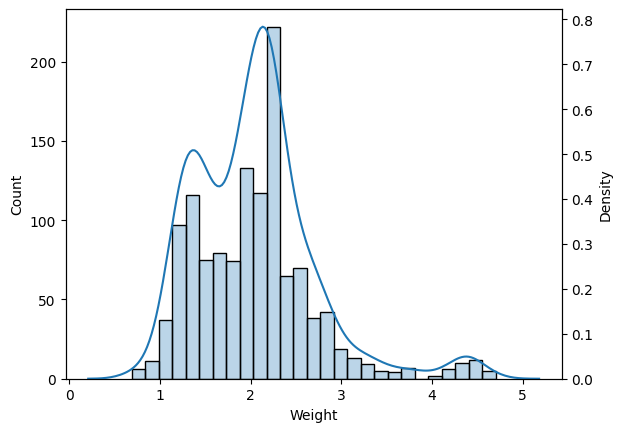

In [64]:
ax_hist = sns.histplot(df['Weight'], alpha=0.3)
ax_kde = ax_hist.twinx()
sns.kdeplot(df['Weight'], ax=ax_kde)
plt.show()

Coorelation

In [65]:
df.corr(numeric_only=True)

,Ram,Weight,Price,IPS panel,Touchscreen,ppi,HDD,SSD
Ram,1.000000,0.389658,0.740106,0.201446,0.111378,0.292964,-0.315033,0.380053
Weight,0.389658,1.000000,0.212192,0.022250,-0.293933,-0.320885,0.157797,-0.033096
Price,0.740106,0.212192,1.000000,0.250358,0.188631,0.469539,-0.424256,0.502688
IPS panel,0.201446,0.022250,0.250358,1.000000,0.139550,0.290634,-0.225864,0.218870
Touchscreen,0.111378,-0.293933,0.188631,0.139550,1.000000,0.454189,-0.151193,0.135264
ppi,0.292964,-0.320885,0.469539,0.290634,0.454189,1.000000,-0.393058,0.365191
HDD,-0.315033,0.157797,-0.424256,-0.225864,-0.151193,-0.393058,1.000000,-0.857537
SSD,0.380053,-0.033096,0.502688,0.218870,0.135264,0.365191,-0.857537,1.000000


<Axes: >

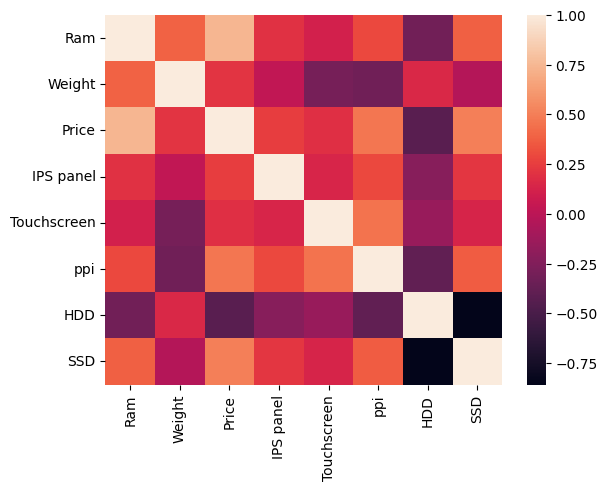

In [66]:
sns.heatmap(df.corr(numeric_only=True))

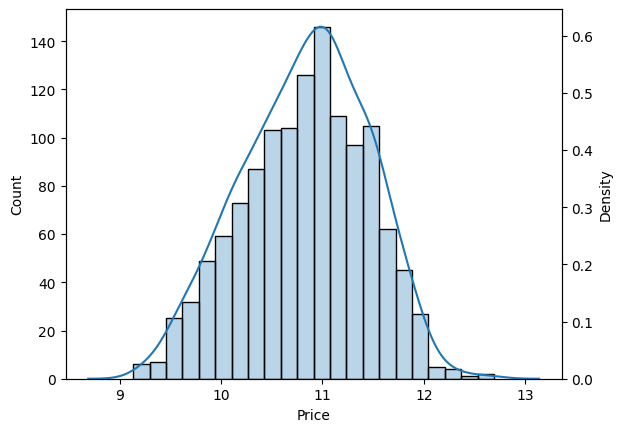

In [67]:
ax_hist = sns.histplot(np.log(df['Price']), alpha=0.3)
ax_kde = ax_hist.twinx()
sns.kdeplot(np.log(df['Price']), ax=ax_kde)
plt.show()

In [68]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [69]:
X

,Company,TypeName,Ram,Weight,IPS panel,Touchscreen,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,1,0,226.983005,Intel Core i5,0.0,128.0,Intel,MacOs
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0.0,0.0,Intel,MacOs
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0.0,128.0,Intel,Linux/Chrome/Android/Other
3,Apple,Ultrabook,16,1.83,1,0,220.534624,Intel Core i7,0.0,128.0,AMD,MacOs
4,Apple,Ultrabook,8,1.37,1,0,226.983005,Intel Core i5,0.0,128.0,Intel,MacOs
...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,2.20,0,0,100.454670,Intel Core i7,128.0,0.0,Nvidia,Windows
1270,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0.0,128.0,Intel,Windows
1271,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0.0,128.0,Intel,Windows
1272,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel processor,0.0,0.0,Intel,Windows


***

***

***

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.32,random_state=2)

In [74]:
X_train

,Company,TypeName,Ram,Weight,IPS panel,Touchscreen,ppi,Cpu brand,HDD,SSD,Gpu brand,os
716,Dell,Notebook,8,1.90,0,0,141.211998,Intel Core i5,0.0,128.0,Intel,Windows
1104,Lenovo,Gaming,16,2.40,0,0,141.211998,Intel Core i7,0.0,128.0,Nvidia,Windows
1137,Dell,Notebook,8,2.50,0,0,100.454670,Intel Core i5,128.0,0.0,AMD,Windows
437,Google,Ultrabook,16,1.10,0,1,234.507400,Intel Core i7,0.0,128.0,Intel,Linux/Chrome/Android/Other
1029,HP,Notebook,8,2.63,0,0,127.335675,Intel Core i5,0.0,128.0,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,128.0,0.0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0.0,128.0,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD processor,128.0,0.0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,128.0,0.0,Nvidia,Linux/Chrome/Android/Other


In [75]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [76]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

### Linear Regression

In [94]:
Step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[0,1,7,10,11])],remainder = 'passthrough')
Step2 = LinearRegression()
pipe = Pipeline(
    [
        ('step1',Step1),
        ('step2',Step2)
    ]
)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print("R2 score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))

R2 score: 0.784037048226329
MAE: 0.21768331315268627


### Rigid Regression

In [93]:
Step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[0,1,7,10,11])],remainder = 'passthrough')
Step2 = Ridge(alpha=10)
pipe = Pipeline(
    [
        ('step1',Step1),
        ('step2',Step2)
    ]
)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

print("R2 score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))

R2 score: 0.7816612568502871
MAE: 0.21802923865786458


### Lasso Regression

In [92]:
Step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[0,1,7,10,11])],remainder = 'passthrough')
Step2 = Lasso(alpha=0.001)
pipe = Pipeline(
    [
        ('step1',Step1),
        ('step2',Step2)
    ]
)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

print("R2 score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))

R2 score: 0.783644277578442
MAE: 0.21726829486180863


### KNN

In [91]:
Step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[0,1,7,10,11])],remainder = 'passthrough')
Step2 = KNeighborsRegressor(n_neighbors=3)
pipe = Pipeline(
    [
        ('step1',Step1),
        ('step2',Step2)
    ]
)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

print("R2 score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))

R2 score: 0.7504998946405592
MAE: 0.22152908539410657


### Decision Tree

In [84]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7809625490814205
MAE 0.21940690805715096


### SVM

In [85]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.817989635130226
MAE 0.19678564856666023


### Random Forest

In [86]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8486359869478175
MAE 0.18018455811107587


### Extra Trees

In [87]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[0,1,7,10,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=None,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8282701529190425
MAE 0.1906341303570423


### AdaBoost

In [88]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7571472939159691
MAE 0.23988890286959033


### Gradient Boost

In [89]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8642178993727903
MAE 0.1727009532275633


### XgBoost

In [90]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8428206337762338
MAE 0.1856913735901842


***

***

***

## Export Model

In [603]:
import pickle

In [605]:
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

***

***

***